### Initial Setup

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px

import scipy.stats
from scipy.stats import chi2

### Load Clean Data

In [3]:
df= pd.read_csv('C:/Users/Ihza/Downloads/Capstone_Project2/capstone_project2/data/processed/cleaned_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       10999 non-null  int64 
 1   Warehouse_block          10999 non-null  object
 2   Mode_of_Shipment         10999 non-null  object
 3   Cost_of_the_Product      10999 non-null  int64 
 4   Product_importance       10999 non-null  object
 5   Discount_offered         10999 non-null  int64 
 6   Reached.on.Time_Y.N      10999 non-null  object
 7   Customer_calls_class     10999 non-null  object
 8   Prior_purchase_category  10999 non-null  object
 9   Weight_category          10999 non-null  object
dtypes: int64(3), object(7)
memory usage: 859.4+ KB


# `Data Analysis`

Setelah melakukan tahap data understanding dan cleaning, kita dapat memulai melakukan analisis untuk mencari tahu apa penyebab terjadinya keterlambatan dalam pengiriman.

Analisis akan dilakukan dengan membandingkan data pengiriman yang datang tepat waktu dan terlambat berdasarkan fitur yang tersedia. dari 10.999 data, hanya 4.436 data yang tepat waktu dalam pengiriman, oleh karena itu kita perlu berhati-hati dalam membandingkan data pengirman berdasarkan ketepatan waktunya, pembandingan lebih baik dilakukan berdasarkan ratio, terutama pada data bertipe kategorikal.

* ### Ketepatan waktu pengiriman

Ketepatan waktu pengiriman menjadi ukuran yang menentukan seberapa baik perusahaan dalam mendistribusikan produknya. 

Dari dataset, ketepatan waktu pengiriman diklasifikasikan menjadi 'Ontime' dan 'Late'. Hal tersebut menjadi batas perusahaan untuk menganalisa apakah produk terkirim tepat waktu atau terlambat. Berikut perbandingan ketepatan waktu pengiriman.

pertama mari kita lihat distribusi data pada ketepatan waktu pengiriman, kita akan menganalisa kolom `Reached.on.Time_Y.N`.

In [5]:
reached_count = df['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_count.columns = ['Reached.on.Time_Y.N', 'Count']
reached_count

,Reached.on.Time_Y.N,Count
0,late,6563
1,ontime,4436


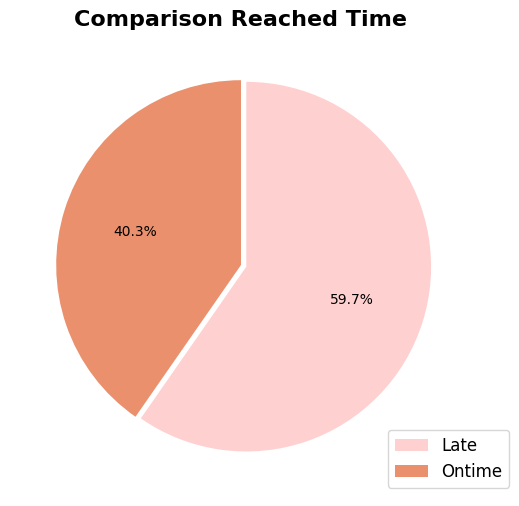

In [28]:
plt.figure(figsize=(8, 6))
plt.title('Comparison Reached Time', fontsize=16, fontweight='bold')

plt.pie(reached_count['Count'],
        autopct='%.1f%%',
        startangle=90,
        counterclock=False,
        colors= ['#FFD0D0', '#EA906C'], 
        explode= (0.03, 0), 
        wedgeprops={'edgecolor': 'black', 'linewidth': 0} 
)

legend_labels = ['Late','Ontime']
plt.legend(legend_labels, loc='lower left', bbox_to_anchor=(0.8, 0), fontsize=12)

Berdasarkan grafik diatas, mayoritas pengiriman didominasi oleh pengiriman terlambat sebanyak 59.7%, sementara pengiriman tepat waktu sebanyak 40.3%.

Dengan informasi ini, kita dapat melihat bahwasanya pengiriman terlambat memiliki jumlah yang lebih banyak daripada pengiriman tepat waktu, ini menunjukkan bahwa keterlambatan lebih sering terjadi pada proses pengiriman produk.

Perusahaan harus membuat perubahan pada pelayanan yang diberikan, mengetahui faktor yang mempengaruhi ketepatan waktu pengiriman akan mempermudah perusahaan dalam pengambilan keputusan perbaikan.

* ### Analisis ketepatan waktu pengiriman berdasarkan tingkat kepentingan produk
Analisa yang akan dilakukan pertama kali adalah apakah ketepatan waktu pengiriman dipengaruhi oleh Product importance.

Data `Product_importance` berisi __low__, __medium__ dan __high__ product importance. Pertama-tama akan dilihat proporsi dari masing-masing product importance. 

In [7]:
#Frekuensi
important_count = df['Product_importance'].value_counts().reset_index()
important_count.columns = ['Product_importance', 'Count']
important_count

,Product_importance,Count
0,low,5297
1,medium,4754
2,high,948


In [8]:
#proporsi
ct_important=pd.crosstab(df['Product_importance'],df['Reached.on.Time_Y.N'],normalize='index').sort_index()
ct_important['Total']=ct_important.sum(axis=1)
ct_important

Reached.on.Time_Y.N,late,ontime,Total
Product_importance,,,
high,0.649789,0.350211,1.0
low,0.592788,0.407212,1.0
medium,0.590450,0.409550,1.0


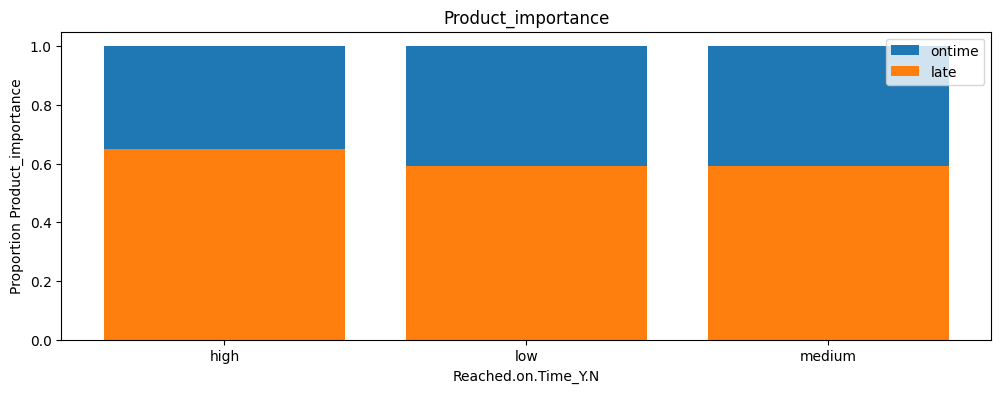

In [9]:
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['Product_importance'].nunique()),ct_important['Total'])
plt.bar(np.arange(df['Product_importance'].nunique()),ct_important['late'])
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel(f'Proportion Product_importance')
plt.legend(['ontime','late'])
plt.xticks(np.arange(len(ct_important.index.tolist())),ct_important.index.tolist())
plt.title('Product_importance')
plt.show()

* Berdasarkan data, dapat dipahami bahwa proporsi antara product importance low, medium dan high memiliki selisih yang sedikit dengan product importance high memiliki proporsi terjadinya keterlambatan paling tinggi dibandingkan product importance lainnya (peluang terjadinya keterlambatan tiap pengiriman tertinggi). 
* Untuk masing-masing product importance cenderung terlambat dalam pengiriman. 

In [10]:
ct_table_ind=pd.crosstab(df["Product_importance"],df["Reached.on.Time_Y.N"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"pvalue:            {p:.5g}")
print(f"degrees of freedom: {dof}")

if p> 0.05: 
    print(f'Pvalue= {p:.5g}. Pvalue > 0.05. Menerima Ho.')
else:
    print(f'Pvalue= {p:.5g}. Pvalue <= 0.05. Tolak Ho.')

chi2 statistic:     12.211
pvalue:            0.0022304
degrees of freedom: 2
Pvalue= 0.0022304. Pvalue <= 0.05. Tolak Ho.


Dari hasil uji statistik kita mempunyai cukup bukti untuk mengatakan bahwa Product_importance dan reached time terkait/dependant (Proporsinya berbeda signifikan)

* ### Analisis ketepatan waktu pengiriman berdasarkan berat kiriman
Melakakukan analisa pengaruh dari kategori berat pengiriman terhadap ketepatan waktu pengiriman.

Data `Weight_category` terdiri atas 3 kategori yaitu __light__, __medium__ dan __heavy__. Tabel proporsi kepuasan digunakan untuk mengetahui besaran proporsi

In [11]:
#Frekuensi
weight_count = df['Weight_category'].value_counts().reset_index()
weight_count.columns = ['Weight_category', 'Count']
weight_count

,Weight_category,Count
0,medium,5499
1,light,3984
2,heavy,1516


In [12]:
ct_weight=pd.crosstab(df['Weight_category'],df['Reached.on.Time_Y.N'],normalize='index').sort_index()
ct_weight['Total']=ct_weight.sum(axis=1)
ct_weight

Reached.on.Time_Y.N,late,ontime,Total
Weight_category,,,
heavy,0.428760,0.571240,1.0
light,0.737450,0.262550,1.0
medium,0.541007,0.458993,1.0


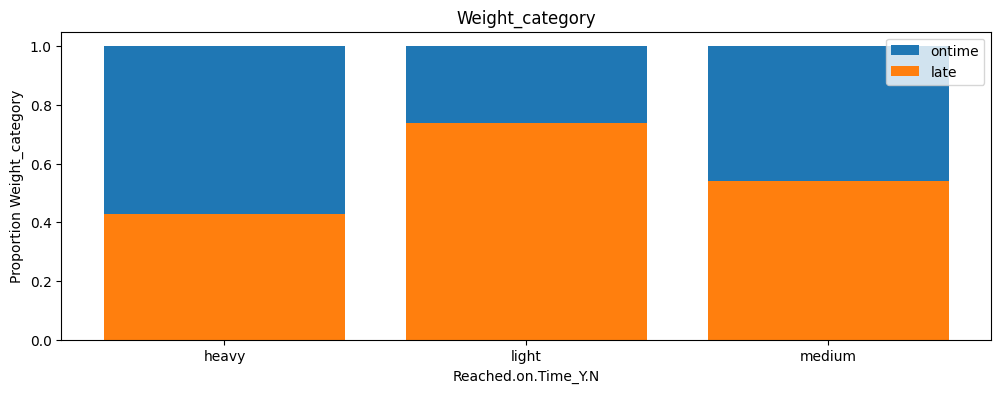

In [13]:
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['Weight_category'].nunique()),ct_weight['Total'])
plt.bar(np.arange(df['Weight_category'].nunique()),ct_weight['late'])

plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel(f'Proportion Weight_category')

plt.legend(['ontime','late'])
plt.xticks(np.arange(len(ct_weight.index.tolist())),ct_weight.index.tolist())
plt.title('Weight_category')
plt.show()

* Dapat dilihat bahwa proporsi antar berat kiriman yang terdiri dari light, medium dan heavy dimana light weight memiliki probabilitas  terjadinya keterlambatan tertinggi dengan 73% kemungkinan terjadinya keterlambatan pada setiap terjadinya pengiriman.

* Dapat diihat juga bahwasanya produk yang termasuk kedalam produk yang berat memiliki nilai keterlambatan yang lebih rendah daripada produk yang ringan atau sedang.

* Untuk masing-masing kategori berat produk cenderung menghasilkan keterlambatan dalam setiap pengiriman.

In [29]:
ct_table_ind=pd.crosstab(df["Weight_category"],df["Reached.on.Time_Y.N"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"pvalue:            {p:.5g}")
print(f"degrees of freedom: {dof}")

if p> 0.05: 
    print(f'Pvalue= {p:.5g}. Pvalue > 0.05. Menerima Ho.')
else:
    print(f'Pvalue= {p:.5g}. Pvalue <= 0.05. Menolak Ho.')

chi2 statistic:     576.51
pvalue:            6.4863e-126
degrees of freedom: 2
Pvalue= 6.4863e-126. Pvalue <= 0.05. Menolak Ho.


Dari hasil uji statistik kita mempunyai cukup bukti untuk mengatakan bahwa Weight_category dan reached time terkait/dependant (Proporsinya berbeda signifikan)

* ### Analisis Kombinasi antar faktor yang terkait dengan produk

Tahap ini akan melihat seberapa besar proprsi terjadinya keterlambatan maupun tepat waktu dalam pengiriman produk sampai ke tangan customer dilihat dari kombinasi faktor-faktor yang berkaitan dengan produk, dalam hal ini adalah __`Product_importance`__ dan __`Weight_category`__

In [27]:
df['Reach_time'] = 'On time or Late?'
fig = px.sunburst(
    df,path=['Reach_time','Reached.on.Time_Y.N','Product_importance','Weight_category'],
    title=f'Proporsi ketepatan waktu pengiriman Berdasarkan Produk',
    width=600, 
    height=600,
)

fig.update_traces(textinfo="label+percent parent")                  
fig.show()

Dari sunburst chart diatas, kita dapat melihat kombinasi faktor yang menghasilkan persentase tepat waktu dan keterlambatan terbesar, dimana perpaduan antara produk dengan tingkat kepentingan sedang dan kategori berat sedang menghasilkan ketepatan waktu pengiriman terbanyak dengan 1162 pengiriman, dan untuk persentase keterlambatan terbanyak dihasilkan oleh produk dengan tingkat kepentingan rendah dan kategori berat ringan dengan 1534 keterlambatan pengiriman.

* ### Analisis ketepatan waktu pengiriman berdasarkan jumlah panggilan ke customer care

Selanjutnya akan dianalisa pengaruh banyaknya panggilan ke customer care pada ketepatan waktu pengiriman.

Data Customer_calls_class berisi 3 class yang terdiri dari __seldom calls__, __occasionally calls__ dan __frequently calls__. Untuk mengetahui proporsi, digunakan fungsi tabel proporsi kepuasan. 

In [16]:
#Frekuensi
calls_count = df['Customer_calls_class'].value_counts().reset_index()
calls_count.columns = ['Customer_calls_class', 'Count']
calls_count

,Customer_calls_class,Count
0,seldom calls,3855
1,frequently calls,3587
2,occasionally calls,3557


In [17]:
#Proporsi
ct_calls=pd.crosstab(df['Customer_calls_class'],df['Reached.on.Time_Y.N'],normalize='index').sort_index()
ct_calls['Total']=ct_calls.sum(axis=1)
ct_calls

Reached.on.Time_Y.N,late,ontime,Total
Customer_calls_class,,,
frequently calls,0.560357,0.439643,1.0
occasionally calls,0.597695,0.402305,1.0
seldom calls,0.629572,0.370428,1.0


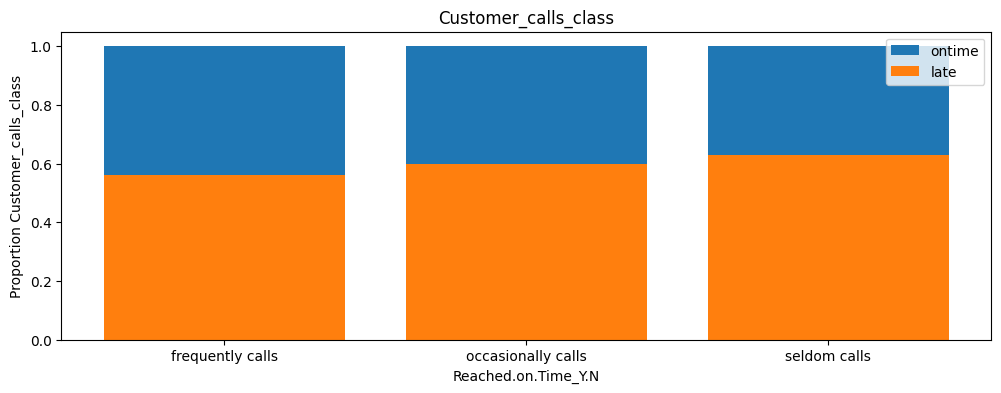

In [18]:
#Bar chart
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['Customer_calls_class'].nunique()),ct_calls['Total'])
plt.bar(np.arange(df['Customer_calls_class'].nunique()),ct_calls['late'])
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel(f'Proportion Customer_calls_class')
plt.legend(['ontime','late'])
plt.xticks(np.arange(len(ct_calls.index.tolist())),ct_calls.index.tolist())
plt.title('Customer_calls_class')
plt.show()

* Dari bagan diatas, dapat dilihat bahwasanya proporsi antar panggilan ke customer care yang terdiri dari frequently calls, occasionally calls dan seldom calls memiliki selisih yang relatif kecil dengan seldom calls memiliki probabilitas 63% terjadinya keterlambatan pada setiap pengiriman.

* Dapat diihat juga bahwasanya produk yang pada saat pengiriman mendapatkan jumlah panggilan ke customer care lebih banyak memiliki nilai keterlambatan yang lebih kecil dibanding produk yang jarang atau hanya sesekali di cek oleh customer melalui customer care.

* Untuk masing-masing product importance cenderung terlambat dalam pengiriman. 

In [19]:
#Uji dependensi
ct_table_ind=pd.crosstab(df["Customer_calls_class"],df["Reached.on.Time_Y.N"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"pvalue:            {p:.5g}")
print(f"degrees of freedom: {dof}")

if p> 0.05: 
    print(f'Pvalue= {p:.5g}. Pvalue > 0.05. Menerima Ho.')
else:
    print(f'Pvalue= {p:.5g}. Pvalue <= 0.05. Menolak Ho.')

chi2 statistic:     37.012
pvalue:            9.1835e-09
degrees of freedom: 2
Pvalue= 9.1835e-09. Pvalue <= 0.05. Menolak Ho.


Dari hasil uji statistik kita mempunyai cukup bukti untuk mengatakan bahwa Customer_calls_class dan reached time terkait/dependant (Proporsinya berbeda signifikan)

* ### Analisis ketepatan waktu pengiriman berdasarkan banyaknya pembelian yang telah dilakukan 
Akan dilakukan dianalisa pengaruh dari banyaknya pembelian yang telah dilakukan customer kepada ketepatan waktu pengiriman.

Data Prior_`purchase_category` mempunyai 2 kategori yang terdiri atas __0-3 purchasee__ dan __> 3 purchase__. Untuk mengetahui besaran proporsi antar kategori, digunakan tabel proporsi kepuasan. 

In [20]:
#Frekuensi
prior_count = df['Prior_purchase_category'].value_counts().reset_index()
prior_count.columns = ['Prior_purchase_category', 'Count']
prior_count

,Prior_purchase_category,Count
0,0-3 purchase,6554
1,> 3 purchase,4445


In [21]:
#Proporsi
ct_prior=pd.crosstab(df['Prior_purchase_category'],df['Reached.on.Time_Y.N'],normalize='index').sort_index()
ct_prior['Total']=ct_prior.sum(axis=1)
ct_prior

Reached.on.Time_Y.N,late,ontime,Total
Prior_purchase_category,,,
0-3 purchase,0.634574,0.365426,1.0
> 3 purchase,0.540832,0.459168,1.0


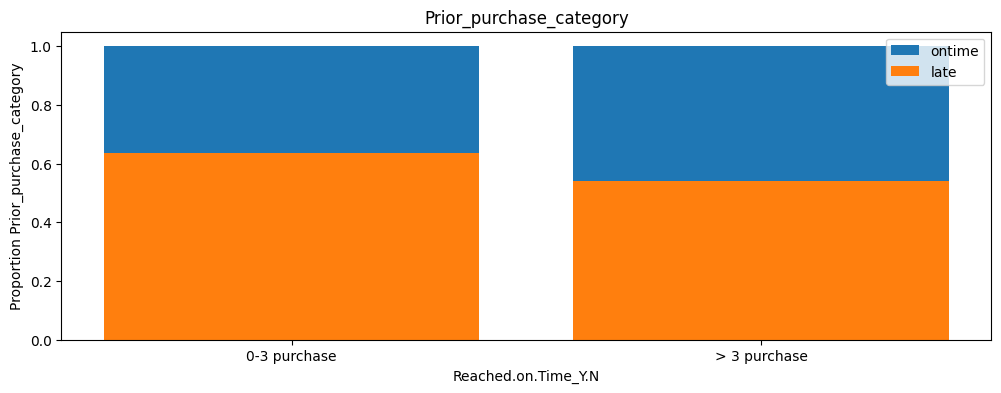

In [22]:
#Bar chart 
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['Prior_purchase_category'].nunique()),ct_prior['Total'])
plt.bar(np.arange(df['Prior_purchase_category'].nunique()),ct_prior['late'])
plt.xlabel('Reached.on.Time_Y.N')
plt.ylabel(f'Proportion Prior_purchase_category')
plt.legend(['ontime','late'])
plt.xticks(np.arange(len(ct_prior.index.tolist())),ct_prior.index.tolist())
plt.title('Prior_purchase_category')
plt.show()

* Dari bagan diatas, dapat dilihat bahwasanya proporsi antar banyaknya pembelian yang telah dilakukan yang terdiri dari0-3 purchase dan > 3 purchase dimana 0-3 purchase memiliki probabilitas 63% terjadinya keterlambatan pada setiap pengiriman.

* Dapat diihat juga bahwasanya customer yang telah membeli > 3 purchase memiliki nilai keterlambatan yang lebih kecil dibanding customer yang jarang atau hanya sesekali melakukan pembelian.

* Untuk masing-masing kategori banyaknya pembelian yang telah dilakukan cenderung menghasilkan keterlambatan dalam pengiriman. 

In [23]:
#Uji dependensi
ct_table_ind=pd.crosstab(df["Prior_purchase_category"],df["Reached.on.Time_Y.N"])

chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(ct_table_ind)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"pvalue:            {p:.5g}")
print(f"degrees of freedom: {dof}")

if p> 0.05: 
    print(f'Pvalue= {p:.5g}. Pvalue > 0.05. Menerima Ho.')
else:
    print(f'Pvalue= {p:.5g}. Pvalue <= 0.05. Menolak Ho.')

chi2 statistic:     96.328
pvalue:            9.7326e-23
degrees of freedom: 1
Pvalue= 9.7326e-23. Pvalue <= 0.05. Menolak Ho.


Setelah melakukan uji statistik kita mempunyai cukup bukti untuk mengatakan bahwa Prior_purchase_category dan reached time terkait/dependant (Proporsinya berbeda signifikan)

Pada `Prior_purchase_category`, dari grafik, customer yang sebelumnya melakukan lebih sedikit transaksi lebih banyak mendapatkan pengiriman produk terlambat, kemungkinan besar ini terjadi karena pihak ekspedisi(kurir) belum familiar dengan alamat customer, untuk itu mari kita uji aapakah proporsi keterlambatan memang secara signifikan lebih tinggi pada customer dengan jumlah transaksi 0-3 kali dibanding ustomer dengan jumlah transaksi lebih dari 3 kali.

In [24]:
from statsmodels.stats.proportion import proportions_ztest
ct_table=pd.crosstab(df['Prior_purchase_category'],df['Reached.on.Time_Y.N'])

stats, p=proportions_ztest(ct_table['late'],ct_table.sum(axis=1),alternative='larger')
if p> 0.05: 
    print(f'Pvalue= {p:.5g}. Pvalue > 0.05. Menerima Ho.')
else:
    print(f'Pvalue= {p:.5g}. Pvalue <= 0.05. Menolak Ho.')

Pvalue= 3.998e-23. Pvalue <= 0.05. Menolak Ho.


Dari hasil uji statistik, kita bisa melihat bahwa memang customer yang sebelumnya melakukan lebih sedikit transaksi (0-3 kali) lebih banyak mendapatkan pengiriman produk terlambat dibandingkan customer yang sebelumnya telah melakukan transaksi lebih dari 3 kali.

In [25]:
ct_table

Reached.on.Time_Y.N,late,ontime
Prior_purchase_category,,
0-3 purchase,4159,2395
> 3 purchase,2404,2041


* ### Analisis kombinasi antar faktor yang terkait dengan customer

Tahap ini akan melihat seberapa besar proprsi terjadinya keterlambatan maupun tepat waktu dalam pengiriman produk sampai ke tangan customer dilihat dari kombinasi faktor-faktor yang berkaitan dengan customer, dalam hal ini adalah __`Prior_purchase_category`__ dan __`Customer_calls_class`__

In [26]:
fig = px.sunburst(
    df,path=['Reach_time','Reached.on.Time_Y.N','Prior_purchase_category','Customer_calls_class'],
    title=f'Proporsi ketepatan waktu pengiriman Berdasarkan Customer',
    width=600, 
    height=600,
)

fig.update_traces(textinfo="label+percent parent")                  
fig.show()

Dari sunburst chart diatas, kita dapat melihat kombinasi faktor yang menghasilkan persentase tepat waktu dan keterlambatan terbesar, dimana perpaduan antara prior purchase >3 dan customer care calls kategori frequently calls menghasilkan ketepatan waktu pengiriman terbanyak dengan 1108 pengiriman, sedangkan untuk persentase keterlambatan terbanyak dihasilkan oleh prior purchase 0-3 dan dan jumlah panggilan ke customer care jarang dengan 1847 keterlambatan pengiriman.

# `Kesimpulan`

Kesimpulan yang didapatkan dari hasil analisa, diantaranya:

__1. Bagaimana performa ketepatan waktu pengiriman berdasarkan data?__

* dari 10999 data yang dimiliki, hanya terdapat 4436 data yang menunjukan bahwasanya produk tiba tepat pada waktunya
* Lebih banyak terjadi keterlambatan dalam pengiriman produk sampai ke tangan customer, dengan persentase sebesar 59,7%
* Berdasarkan tingkat kepentingan barang, pengiriman paling banyak terjadi pada produk yang memiliki tingkat kepentingan rendah (low) 
* Mayoritas pengirman adalah pengiriman produk dengan berat yang masuk kedalam kategori medium
* kebanyakan customer melakukan panggilan ke customer care terkait pengiriman produk sebanyak kurang dari dua kali
* kebanyakan customer telah melakukan transaksi leih dari 4 kali

__2. Apa faktor yang mempengaruhi keterlambatan pengiriman?__

keterlambatan pengiriman barang dipengaruhi oleh beberapa faktor:
* __Product importance :__ produk yang memiliki tingkat importansi yang tinggi
* __Weight Category :__ produk yang memiliki berat yang termasuk kedalam kategori ringan
* __Customer care calls :__ customer yang jarang melakukan panggilan ke customer care
* __Prior purchase :__ customer yang kurang dari 3 kali melakukan transaksi 

secara frekuensi, jumlah keterlambatan terbanyak juga disebabkan oleh kombinasi antara produk dengan tingkat kepentingan rendah dan kategori berat ringan, dan kombinasi antara jumlah transaksi customer yang kurang dari 3 dan dan jumlah panggilan ke customer care jarang


# `Rekomendasi`

Rekomendasi yang dapat diberikan adalah:
* untuk mengurangi tingkat keterlambatan, diutamakan melakukan optimalisasi pada faktor faktor yang mempengaruhi ketepatan waktu pengiriman.
* lebih memperhatikan pengiriman produk dengan tingkat kepentingan yang tinggi karena terlepas dari banyaknya jumlah pengiriman, kemungkinan terjadinya keterlambatan lebih besar dari tingkat kepentingan lainnya.
* Fokus menangani keterlambatan pada produk dengan kategori berat ringan, bisa dengan membuat keranjang atau area khusus untuk masing masing berat, apalagi produk yang termasuk kedalam berat ringan yang kemungkinan mudah tercecer.
* karena customer care calls yang tinggi memiliki nilai proporsi keterlambatan yang lebih rendah dibanding customer care calls yang rendah, ini menandakan bahwasanya product baru akan dilakukan proses ketika customer banyak menanyakan proses pegiriman, atau kurangnya kedisipinan karyawan terhadap SOP, maka perlu mengkaji ulang dan menerapkan SOP yang lebih tepat guna.
* Lebih banyak terjadi keterlambatan pengiriman pada customer yang lebih sedikit melakukan transaksi daripada yang telah melakukan banyak transaksi, mungkin bisa dilakukan training pada kurir atau optimalisasi terkait dengan wilayah dan zona pengiriman barang. 